# Plot model selection metrics for each HMM object

Plot AIC, BIC (dual-axis) and log-likelihood for each HMM state count.

Assumes each pickle is a *list* with a single dict that contains:
    {'k': int, 'AIC': float, 'BIC': float, 'logL': float, ...}

In [1]:
import os, glob, pickle
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

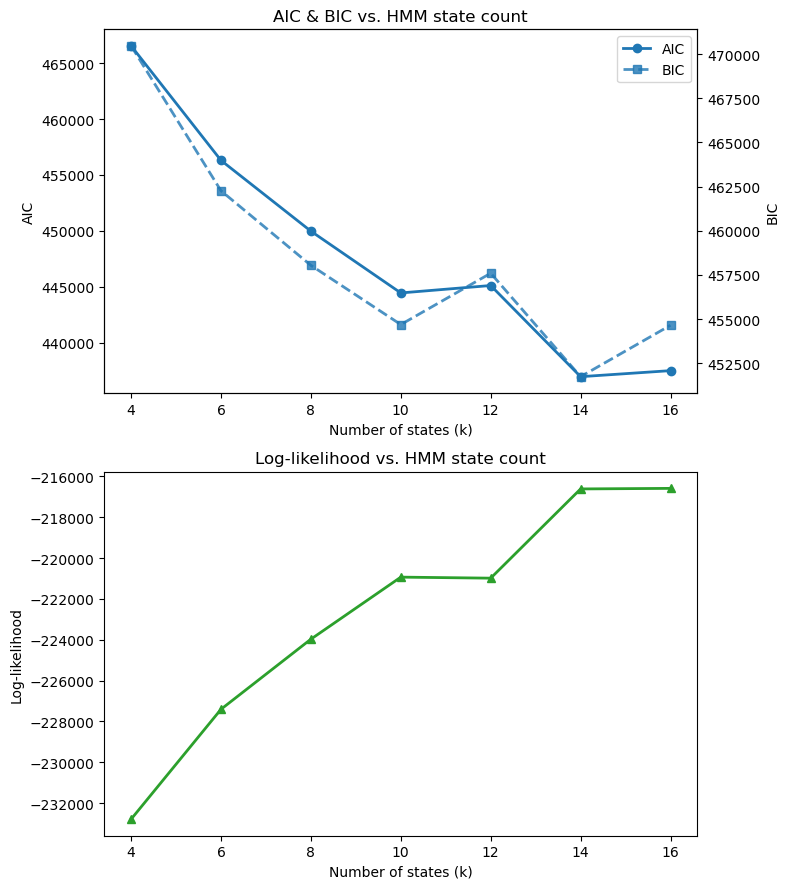

In [3]:
# ── Settings ───────────────────────────────────────────────────────────
DIR     = "/home/jovyan/narratives-project/hmm-objects"
PATTERN = "hmmlearn_consensus_results_k*.pkl"
# ───────────────────────────────────────────────────────────────────────

# 1) Load metrics from every pickle
records = []
for fp in glob.glob(os.path.join(DIR, PATTERN)):
    with open(fp, "rb") as f:
        obj = pickle.load(f)

    entry = obj[0] if isinstance(obj, list) else obj      # convention
    k     = entry.get("k") or int(Path(fp).stem.split("_k")[-1])

    records.append(
        {"k": k, "AIC": entry["AIC"], "BIC": entry["BIC"], "logL": entry["logL"]}
    )

if not records:
    raise RuntimeError(f"No matching pickle files found in {DIR}")

df = pd.DataFrame(records).sort_values("k")

# 2) Plot AIC & BIC on twin y-axes
fig = plt.figure(figsize=(8, 9))

ax1 = fig.add_subplot(2, 1, 1)
ax2 = ax1.twinx()

ax1.plot(df["k"], df["AIC"], marker="o", linewidth=2, label="AIC")
ax2.plot(df["k"], df["BIC"], marker="s", linestyle="--", linewidth=2, label="BIC", alpha=0.8)

ax1.set_xlabel("Number of states (k)")
ax1.set_ylabel("AIC")
ax2.set_ylabel("BIC")
ax1.set_title("AIC & BIC vs. HMM state count")

lns, lbls = ax1.get_legend_handles_labels()
lns2, lbls2 = ax2.get_legend_handles_labels()
ax1.legend(lns + lns2, lbls + lbls2, loc="upper right")

# 3) Plot log-likelihood separately to keep scales clean
ax3 = fig.add_subplot(2, 1, 2)
ax3.plot(df["k"], df["logL"], marker="^", linewidth=2, color="tab:green")
ax3.set_xlabel("Number of states (k)")
ax3.set_ylabel("Log-likelihood")
ax3.set_title("Log-likelihood vs. HMM state count")

fig.tight_layout()
plt.show()